In [1]:
import pandas as pd
from sqlalchemy import create_engine # database connection
import datetime as dt
from IPython.display import display

import plotly.plotly as py # interactive graphing
from plotly.graph_objs import Bar, Scatter, Marker, Layout 
from plotly.offline import plot
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
!pip install plotly==3.10.0

  Attempting uninstall: plotly
    Found existing installation: plotly 4.8.1
    Uninstalling plotly-4.8.1:
      Successfully uninstalled plotly-4.8.1


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [5]:
!pip install chart_studio

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
#311_Service_Requests
display(pd.read_csv('311_Service_Requests.csv', nrows=2).head())
display(pd.read_csv('311_Service_Requests.csv', nrows=2).tail())

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,33469659,05/29/2016 02:02:00 PM,05/29/2016 03:50:00 PM,DEP,Department of Environmental Protection,Sewer,Sewer Backup (Use Comments) (SA),NaN,10035,13 HELLGATE CIRCLE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.784913,-73.928407,"(40.78491317208068, -73.92840728790559)"
1,33469660,05/29/2016 11:39:35 AM,07/29/2016 08:12:45 AM,DOHMH,Department of Health and Mental Hygiene,Food Establishment,Rodents/Insects/Garbage,Restaurant/Bar/Deli/Bakery,10003,245 EAST 14 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.732861,-73.986137,"(40.732861290954354, -73.98613717815391)"


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,33469659,05/29/2016 02:02:00 PM,05/29/2016 03:50:00 PM,DEP,Department of Environmental Protection,Sewer,Sewer Backup (Use Comments) (SA),NaN,10035,13 HELLGATE CIRCLE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.784913,-73.928407,"(40.78491317208068, -73.92840728790559)"
1,33469660,05/29/2016 11:39:35 AM,07/29/2016 08:12:45 AM,DOHMH,Department of Health and Mental Hygiene,Food Establishment,Rodents/Insects/Garbage,Restaurant/Bar/Deli/Bakery,10003,245 EAST 14 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.732861,-73.986137,"(40.732861290954354, -73.98613717815391)"


In [9]:
!wc -l < 311_Service_Requests.csv # Number of lines in dataset

'wc' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# Initializes database with filename 311_8M.db in current directory
disk_engine = create_engine('sqlite:///311_Service_Requests.db') 

In [4]:
start = dt.datetime.now()
chunksize = 20000
j = 0
index_start = 1

for df in pd.read_csv('311_Service_Requests.csv',chunksize=chunksize, iterator = True, encoding = 'utf8'):
    # Remove spaces from columns
    df = df.rename(columns={c: c.replace(' ','') for c in df.columns})
    
    # Convert to datetimes
    df['CreatedDate'] = pd.to_datetime(df['CreatedDate'])
    df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])
    
    df.index += index_start
    
    # Remove the un-interesting columns
    columns = ['Agency', 'CreatedDate', 'ClosedDate', 'ComplaintType', 'Descriptor',
               'CreatedDate', 'ClosedDate', 'TimeToCompletion',
               'City']
    
    for c in df.columns:
        if c not in columns:
            df = df.drop(c, axis =1)
            
    j+=1
    
    print ('{} seconds: completed {} rows'.format((dt.datetime.now() - start).seconds, j*chunksize))
    
    df.to_sql('data', disk_engine, if_exists='append')
    
    index_start = df.index[-1] + 1
    

3 seconds: completed 20000 rows
7 seconds: completed 40000 rows
11 seconds: completed 60000 rows


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (31,32) have mixed types. Specify dtype option on import or set low_memory=False.



15 seconds: completed 80000 rows
19 seconds: completed 100000 rows
20 seconds: completed 120000 rows


In [5]:
df = pd.read_sql_query('SELECT * FROM data LIMIT 3', disk_engine)
df.head()

,index,CreatedDate,ClosedDate,Agency,ComplaintType,Descriptor,City
0,1,2016-05-29 14:02:00.000000,2016-05-29 15:50:00.000000,DEP,Sewer,Sewer Backup (Use Comments) (SA),NEW YORK
1,2,2016-05-29 11:39:35.000000,2016-07-29 08:12:45.000000,DOHMH,Food Establishment,Rodents/Insects/Garbage,NEW YORK
2,3,2016-05-29 16:23:25.000000,None,DPR,Dead/Dying Tree,Planted More Than 2 Years Ago,BROOKLYN


In [6]:
df = pd.read_sql_query('SELECT Agency, Descriptor FROM data LIMIT 3', disk_engine)
df.head()

,Agency,Descriptor
0,DEP,Sewer Backup (Use Comments) (SA)
1,DOHMH,Rodents/Insects/Garbage
2,DPR,Planted More Than 2 Years Ago


In [8]:
df = pd.read_sql_query('SELECT ComplaintType, Descriptor, Agency FROM data LIMIT 10',disk_engine)
df

,ComplaintType,Descriptor,Agency
0,Sewer,Sewer Backup (Use Comments) (SA),DEP
1,Food Establishment,Rodents/Insects/Garbage,DOHMH
2,Dead/Dying Tree,Planted More Than 2 Years Ago,DPR
3,UNSANITARY CONDITION,PESTS,HPD
4,UNSANITARY CONDITION,GARBAGE/RECYCLING STORAGE,HPD
5,Water System,Hydrant Defective (WC2),DEP
6,Sewer,Manhole Overflow (Use Comments) (SA1),DEP
7,WATER LEAK,HEAVY FLOW,HPD
8,UNSANITARY CONDITION,MOLD,HPD
9,Blocked Driveway,Partial Access,NYPD


In [11]:
df = pd.read_sql_query('SELECT ComplaintType, Descriptor, Agency FROM data WHERE agency = "NYPD" LIMIT 10',disk_engine)
df.head()

,ComplaintType,Descriptor,Agency
0,Blocked Driveway,Partial Access,NYPD
1,Vending,In Prohibited Area,NYPD
2,Blocked Driveway,Partial Access,NYPD
3,Noise - Residential,Loud Talking,NYPD
4,Noise - Street/Sidewalk,Loud Music/Party,NYPD


In [15]:
df = pd.read_sql_query('SELECT ComplaintType, Descriptor, Agency FROM data WHERE Agency IN("NYPD","DOB") LIMIT 10', disk_engine)
df.head()

,ComplaintType,Descriptor,Agency
0,Blocked Driveway,Partial Access,NYPD
1,Vending,In Prohibited Area,NYPD
2,Blocked Driveway,Partial Access,NYPD
3,Noise - Residential,Loud Talking,NYPD
4,Noise - Street/Sidewalk,Loud Music/Party,NYPD


In [16]:
df = pd.read_sql_query('SELECT DISTINCT City FROM data', disk_engine)
df.head()

,City
0,NEW YORK
1,BROOKLYN
2,Flushing
3,Ozone Park
4,BRONX


In [18]:
df = pd.read_sql_query('SELECT Agency, COUNT(*) AS "Number_Of_Complaints" FROM data GROUP BY Agency',disk_engine)
df.head()

,Agency,Number_Of_Complaints
0,3-1-1,23
1,DCA,886
2,DEP,9605
3,DFTA,12
4,DHS,2922


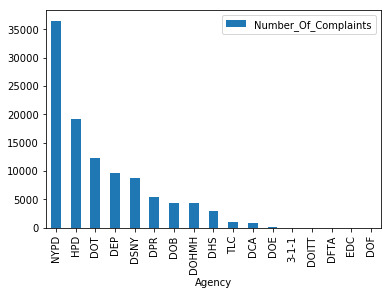

In [43]:
df = pd.read_sql_query('SELECT Agency, COUNT(*) AS "Number_Of_Complaints" FROM data GROUP BY Agency ORDER BY - "Number_Of_Complaints" ',disk_engine)
df.head()
df.plot(x="Agency", y="Number_Of_Complaints",kind='bar' )
plt.show()

In [44]:
df = pd.read_sql_query('SELECT ComplaintType, COUNT(*) as `num_complaints`, Agency '
                       'FROM data '
                       'GROUP BY `ComplaintType` '
                       'ORDER BY -num_complaints', disk_engine)
df.head()

,ComplaintType,num_complaints,Agency
0,Noise - Residential,11417,NYPD
1,Illegal Parking,6389,NYPD
2,Blocked Driveway,5838,NYPD
3,Street Condition,4674,DOT
4,Noise - Street/Sidewalk,4556,NYPD


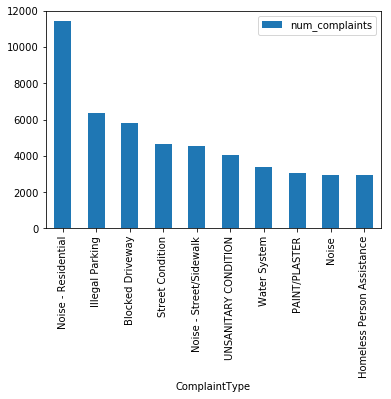

In [46]:
df.head(10).plot(x="ComplaintType",y="num_complaints", kind='bar')
plt.show()

In [8]:
len(pd.read_sql_query('SELECT DISTINCT city FROM data',disk_engine))

92

In [9]:
df = pd.read_sql_query('SELECT City, COUNT(*) as `num_complaints` '
                                'FROM data '
                                'GROUP BY `City` '
                       'ORDER BY -num_complaints '
                       'LIMIT 10 ', disk_engine)
df

,City,num_complaints
0,BROOKLYN,67640
1,NEW YORK,44748
2,BRONX,36288
3,STATEN ISLAND,11526
4,Jamaica,2778
5,JAMAICA,2460
6,FLUSHING,2036
7,ASTORIA,1890
8,Astoria,1776
9,Flushing,1760


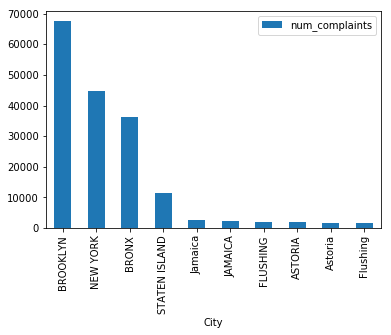

In [10]:
df.plot(x='City',y='num_complaints',kind='bar')
plt.show()

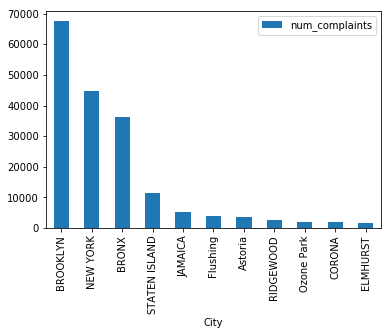

In [11]:
df = pd.read_sql_query('SELECT City, COUNT(*) as `num_complaints` '
                        'FROM data '
                        'GROUP BY `City` '
                       'COLLATE NOCASE '
                       'ORDER BY -num_complaints '
                       'LIMIT 11 ', disk_engine)
df
df.plot(x='City',y='num_complaints',kind='bar')
plt.show()

In [12]:
cities = list(df.City)
cities

['BROOKLYN',
 'NEW YORK',
 'BRONX',
 'STATEN ISLAND',
 'JAMAICA',
 'Flushing',
 'Astoria',
 'RIDGEWOOD',
 'Ozone Park',
 'CORONA',
 'ELMHURST']

In [33]:
# the series in the graph - one trace for each city

traces = []
for city in cities:
    df = pd.read_sql_query('SELECT ComplaintType, COUNT(*) AS `num_complaints` FROM data '
                           'WHERE City = "{}" COLLATE NOCASE GROUP BY `ComplaintType`' 
                           'ORDER BY -num_complaints'.format(city),disk_engine)
    
    comt = df['ComplaintType']
    numcomt = df['num_complaints']
    name=city.capitalize()
    traces.append([comt, numcomt, name])

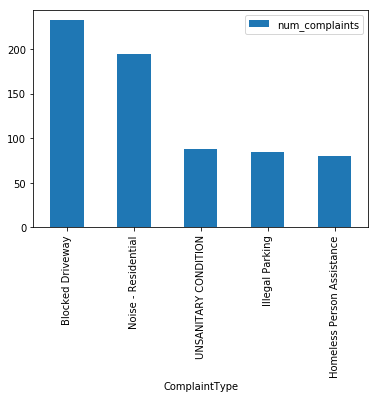

In [40]:
df.head().plot(x='ComplaintType',y='num_complaints' ,kind='bar',stacked =True)
plt.show()


In [35]:
print(traces)

[[0             Noise - Residential
1                 Illegal Parking
2                Blocked Driveway
3                Street Condition
4            UNSANITARY CONDITION
                  ...            
131    Municipal Parking Facility
132                 Public Toilet
133                       Smoking
134    Sustainability Enforcement
135                     Trans Fat
Name: ComplaintType, Length: 136, dtype: object, 0      7816
1      5050
2      4366
3      2968
4      2786
       ... 
131       2
132       2
133       2
134       2
135       2
Name: num_complaints, Length: 136, dtype: int64, 'Brooklyn'], [0      Homeless Person Assistance
1             Noise - Residential
2         Noise - Street/Sidewalk
3                           Noise
4                 Illegal Parking
                  ...            
129          Harboring Bees/Wasps
130           Illegal Animal Sold
131             Illegal Fireworks
132           Sweeping/Inadequate
133              VACANT APARTMENT
Name: 